# Лекция 11.  Тензоры и тензорные разложения

## План на сегодня

- Тензоры
- Тензорные разложения
- Приложения тензорных разложений

## Тензоры

Будем называть тензором многомерный массив:

$$
A(i_1, \dots, i_d), \quad 1\leq i_k\leq n_k,
$$

где $d$ называется размерностью, а $n_k$ количеством мод.
Это стандартное определение в сообществе прикладных математиков, более подробно смотрите в [[1]](http://arxiv.org/pdf/1302.7121.pdf) и [[2]](http://epubs.siam.org/doi/abs/10.1137/090752286).

* $d=2$ (матрицы) $\Rightarrow$ классическая теория (SVD, LU, QR, $\dots$)

* $d\geq 3$ (тензоры) $\Rightarrow$ в стадии разработки. Обобщение стандартных результатов для матриц не является **прямолинейным**.
<img src="./tensor_dogs.png">

Изображение из [этой презентации](http://users.cecs.anu.edu.au/~koniusz/tensors-cvpr17/present/anandkumar_anima_tmcv2017.pdf)

## Более формальное определение

- Тензор - это мультилинейная форма.
- Когда вы фиксируете базис, то получаете $d$-мерный массив.

## Проклятие размерности

Проблема в работе с многомерными данными в том, что число параметров растёт <font color='red'> экспоненциально </font> с ростом $d$:


$$
    \text{storage} = n^d.
$$

Например, для $n=2$ и $d=500$
$$
    n^d = 2^{500} \gg 10^{83}  -  \text{ число атомов во вселенной}
$$

- Почему нас это волнует? Кажется, что мы живём в трёхмерном мире :)

## Приложения

#### Квантовая химия

Стационарное уравнение Шрёдингера для системы с $N_{el}$ электронами

$$
    \hat H \Psi = E \Psi,
$$

где

$$
\Psi = \Psi(\{{\bf r_1},\sigma_1\},\dots, \{{\bf r_{N_{el}}},\sigma_{N_{el}}\})
$$

3$N_{el}$ пространственных переменных и $N_{el}$ спиновых переменных. 
<img src="./large_mol.jpg" width=600>

* Создание новых материалов и лекарств
* Предсказание результатов физических экспериментов

#### Работа в условиях неопределённости (uncertainty quantification)

Пример: моделирование нефтяного месторождения. Модель может зависеть от параметров $p_1,\dots,p_d$ (измеренных в эксперименте, например температуре, пористость), известными неточно

$$
u = u(t,{\bf r},\,{p_1,\dots,p_d})
$$

#### И многие другие

* Обработка сигналов
* Рекомендательные системы: [обзор](https://arxiv.org/pdf/1603.06038.pdf)
* Нейронные сети: сжатие слоёв с использования тензорных разложений (например [статья 1](https://arxiv.org/pdf/1412.6553) и [статья 2](https://papers.nips.cc/paper/2015/file/6855456e2fe46a9d49d3d3af4f57443d-Paper.pdf))
* Языковые модели
* Финансовая математика
* ...

## Как работать с большим числом размерностей?

- **Монте-Карло**: класс методов, основанный на сэмплировании. Есть проблемы со сходимостью
- **Разреженные сетки**: специальный тип сеток с малым количеством параметров. Сильные условия регулярности
- **Лучшая аппроксимация N слагаемыми** : разреженное представление в заданном базисе.
- Подход <font color='red'>**тензорных разложений** </font>

## Тензорные разложения

## 2D

Скелетное разложение:

$$ A = UV^T $$

или поэлементно:

$$ a_{ij} = \sum_{\alpha=1}^r u_{i\alpha} v_{j\alpha} $$

приводит нас к идее **разделения переменных**

**Свойства:**
* Неединственно: $A = U V^T = UBB^{-1}V^T = \tilde U \tilde V^T$
* Может бысть вычислена устойчиво с помощью **SVD**

## Каноническое разложение

Наиболее прямолинейное обобщение идеи разделения переменных на несколько размерностей - это **каноническое разложение**: (альтернативные названия CP/CANDECOMP/PARAFAC)

$$
a_{ijk} = \sum_{\alpha=1}^r u_{i\alpha} v_{j\alpha} w_{k\alpha},
$$

минимально возможное $r$ называется **каноническим рангом**. Матрицы $U$, $V$ и $W$ называются **каноническими факторами**. Это разложение было предложено в 1927 Hitchcock'ом, [link](https://onlinelibrary.wiley.com/doi/abs/10.1002/sapm192761164).

### Свойства:

* Память: для $d$-мерного тензора требуется хранить $nrd$ элементов 
* Единственно при условии несильных ограничений
* Множество тензоров ранга $\leq r$ не замкнуто (в отличии от матриц): <br>
  $a_{ijk} = i+j+k$, $\text{rank}(A) = 3$, но
  
  $$a^\epsilon_{ijk} = \frac{(1+\epsilon i)(1+\epsilon j)(1+\epsilon k) - 1}{\epsilon}\to i+j+k=a_{ijk},\quad \epsilon\to 0 $$
  
  и $\text{rank}(A^{\epsilon}) = 2$
* Отсутствует устойчивый алгоритм для вычисления наилучшей аппроксимации ранга $r$

### Алгоритм попеременных наименьших квадратов

0. Инициализировать $U,V,W$
1. Фиксировать $V,W$, решить задачу наименьших квадратов для $U$
2. Фиксировать $U,W$, решить задачу наименьших квадратов для $V$
3. Фиксировать $U,V$, решить задачу наименьших квадратов для $W$
4. Возвращаемся на шаг 1.

### Сжатие глубоких свёрточных сетей ([Lebedev, et. al 2015](https://arxiv.org/pdf/1412.6553.pdf))

- Свёртки вычисляются с помощью 4-мерного тензора (также называется ядро)
- Применим CP-разложение в этому тензору
- Применим последовательно свёртки с меньшими ядрами, заданными факторами в CP разложении
- Дообучим полученную модель

<img src="./cp_compress_dnn.png" width=600>

torch.Size([128, 128, 128])


Text(0, 0.5, 'Rel approximation error')

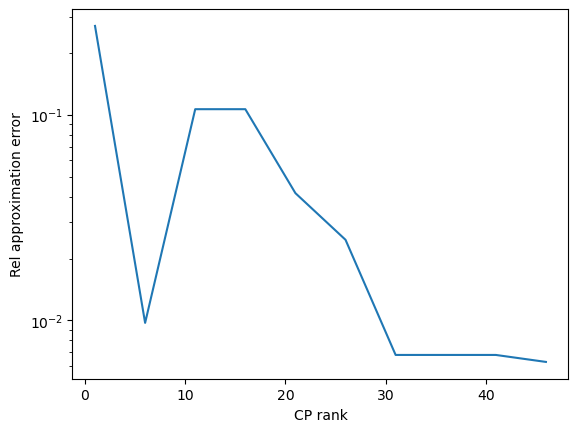

In [10]:
import torch
torch.set_default_dtype(torch.float64)
import tntorch as tn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X, Y, Z = np.meshgrid(range(128), range(128), range(128))
full = torch.Tensor(1. / (X + Y + Z + 1 ))  # Some analytical 3D function
print(full.shape)

# Test CP with different ranks, CP is computed with ALS, tol and max_iter are given
rank_range = np.arange(1, 50, 5)
error_rec = []
for r in rank_range:
    cp_t = tn.Tensor(full, ranks_cp=r, verbose=False, tol=1e-5, max_iter=50)
    error_rec.append(torch.norm(cp_t.torch() - full).item() / torch.norm(full).item())
plt.semilogy(rank_range, error_rec)
plt.xlabel("CP rank")
plt.ylabel("Rel approximation error")

## Разложение Таккера

Следующая тнзорное разложение было предложено в работе ([Tucker, 1963](https://link.springer.com/content/pdf/10.1007/BF02289464.pdf)) в журнале [Psychometrika](https://link.springer.com/journal/11336):

$$
a_{ijk} = \sum_{\alpha_1,\alpha_2,\alpha_3=1}^{r_1,r_2,r_3}g_{\alpha_1\alpha_2\alpha_3} u_{i\alpha_1} v_{j\alpha_2} w_{k\alpha_3}.
$$

В этом случае у нас несколько различных рангов. Минимально возможные $r_1,r_2,r_3$ называются **рангами Таккера**.

**Свойства**:

* Для $d$-мерного массива нужна <font color='red'>$r^d$</font> $+ nrd$ памяти, по-прежнему есть экспоненциальный рост!
* Устойчивый алгоритм, основанный на SVD:
    1. $U =$ главные компоненты развёртки `A.reshape(n1, n2*n3)`
    2. $V =$ главные компоненты развёртки `A.transpose([1,0,2]).reshape(n2, n1*n3)`
    3. $W =$ главные компоненты развёртки `A.transpose([2,0,1]).reshape(n3, n1*n2)`
    4. $g_{\alpha_1\alpha_2\alpha_3} = \sum_{i,j,k=1}^{n_1,n_2,n_3} a_{ijk} u_{i\alpha_1} v_{j\alpha_2} w_{k\alpha_3}$.

Text(0, 0.5, 'Rel approximation error')

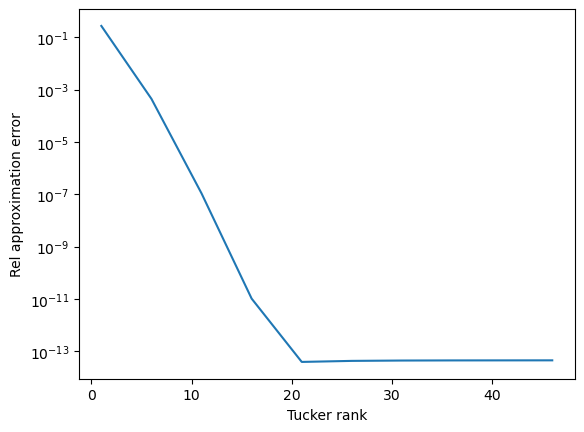

In [11]:
# Actually here is TT-Tucker format
t_error = []
for t_rank in rank_range:
    tt_tucker_t = tn.Tensor(full, ranks_tucker=t_rank)
    t_error.append(torch.norm(tt_tucker_t.torch() - full).item() / torch.norm(full).item())
    
plt.semilogy(rank_range, t_error)
plt.xlabel("Tucker rank")
plt.ylabel("Rel approximation error")

### Применение в рекомендательных системах [(Frolov, Oseledets 2016)](https://dl.acm.org/citation.cfm?id=2959170)

- Представим матрицу **пользователей-товаров** как бинарный тензор **пользователей-товаров-рейтингов**
- После разложения Таккера этого тензора у нас будут три фактора
- Два из них являются проекциями на пространство рейтингов и пространство товаров
- Этот подход позволяет принять во внимание негативные оценки товаров некоторыми пользователями

## Реализации разложений CP и Таккера

- Matlab: [Tensorlab](https://www.tensorlab.net/) и [Tensor Toolbox](https://www.sandia.gov/~tgkolda/TensorToolbox/index-2.5.html)
- Python: [TensorLy](http://tensorly.org/stable/home.html), [Scikit-tensor](https://github.com/mnick/scikit-tensor), [tntorch](https://github.com/rballester/tntorch)

## Разложение тензорного поезда (Tensor Train decomposition)

* Вычисление канонического разложения неустойчиво
* Разложение Таккера не решает проблему экспоненциального роста параметров

Разложение тензорного поезда (**TT**-разложение) ([Oseledets, Tyrtyshnikov 2009](http://www.mat.uniroma2.it/~tvmsscho/papers/Tyrtyshnikov4.pdf) и [Oseledets, 2011](https://epubs.siam.org/doi/abs/10.1137/090752286)) одновременно и устойчиво и содержит линейное по количеству размерностей число параметров:

$$
a_{i_1 i_2 \dots i_d} = \sum_{\alpha_1,\dots,\alpha_{d-1}} 
g_{i_1\alpha_1} g_{\alpha_1 i_2\alpha_2}\dots g_{\alpha_{d-2} i_{d-1}\alpha_{d-1}} g_{\alpha_{d-1} i_{d}}
$$

или в матричной форме

$$
    a_{i_1 i_2 \dots i_d} = G_1 (i_1)G_2 (i_2)\dots G_d(i_d)
$$

* Требуется памяти $\mathcal{O}(dnr^2)$ 
* Устойчивый TT-SVD алгоритм

**Пример**

$$a_{i_1\dots i_d} = i_1 + \dots + i_d$$

Канонический ранг равен $d$. В то же время TT-ранги равны $2$:

$$
i_1 + \dots + i_d = \begin{pmatrix} i_1 & 1 \end{pmatrix} 
\begin{pmatrix} 1 & 0 \\ i_2 & 1 \end{pmatrix}
\dots
\begin{pmatrix} 1 & 0 \\ i_{d-1} & 1 \end{pmatrix}
\begin{pmatrix} 1  \\  i_d \end{pmatrix}
$$

Text(0, 0.5, 'Rel approximation error')

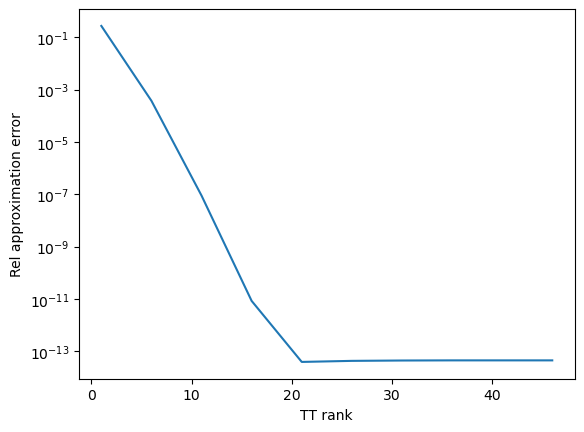

In [12]:
error_rec = []
for r in rank_range:
    tt_t = tn.Tensor(full, ranks_tt=r)
    error_rec.append(torch.norm(tt_t.torch() - full).item() / torch.norm(full).item())
plt.semilogy(rank_range, error_rec)
plt.xlabel("TT rank")
plt.ylabel("Rel approximation error")

In [17]:
print(cp_t)
print(tt_t)
print(tt_tucker_t)
print(cp_t.numcoef(), tt_t.numcoef(), tt_tucker_t.numcoef(), full.numel())

3D CP tensor:

 128 128 128
  |   |   |
 <0> <1> <2>
 / \ / \ / \
46  46  46  46

3D TT tensor:

 128 128 128
  |   |   |
 (0) (1) (2)
 / \ / \ / \
1   33  35  1

3D TT-Tucker tensor:

 128 128 128
  |   |   |
 29  46  37
 (0) (1) (2)
 / \ / \ / \
1   128 37  1

17664 156544 237273 2097152


### Реализации

- Matlab: [TT Toolbox](https://github.com/oseledets/TT-Toolbox)
- Python: [ttpy](https://github.com/oseledets/ttpy), [teneva](https://github.com/AndreiChertkov/teneva)
- TensorFlow: [t3f](https://github.com/Bihaqo/t3f)
- PyTorch: [tt-pytorch](https://github.com/KhrulkovV/tt-pytorch) and [tntorch](https://github.com/rballester/tntorch)


## Использование TT-разложения в римановой оптимизации

- Пусть дан тензор $A$ в ТТ формате с большими tt-рангами
- Хотим найти такой тензор $X$ (с малым заданным tt-рангом $r$), который наиболее близок к $A$ по Фробениусовой норме:
\begin{equation*}
\begin{aligned}
& \underset{X}{\text{minimize}} 
& & \frac{1}{2}\|X - A\|_F^2 \\
& \text{subject to} 
& & \text{tt_rank}(X) = r
\end{aligned}
\end{equation*}

- Известно, что множество тензоров в ТТ формате с поэлементно фиксированными TT рангами образует многообразие
- Поэтому мы можем решать эту задачу используя так называемый риманов градиентный спуск. 

### Риманов градиентный спуск

- Пусть дана некоторая функция $F$ на многообразии $\mathcal{M}$. Римановым градиентным спуском называется следующая процедура 

$$\hat{x}_{k+1} = x_{k} - \alpha P_{T_{x_k}\mathcal{M}} \nabla F(x_k),$$

$$x_{k+1} = \mathcal{R}(\hat{x}_{k+1})$$

где $P_{T_{x_k}\mathcal{M}}$ проекция на касательное пространство к $\mathcal{M}$ в точке $x_k$, а $\mathcal{R}$ называется ретракция - операция проекции точки с касательного пространства на многообразие и $\alpha > 0$ размер шага

- Далее показана реализация с помощью библиотеки `t3f`. В качестве ретракции используется процедура отсечения по tt-рангу (`t3f.round`).

In [3]:
import t3f
import tensorflow as tf
tf.set_random_seed(0)
np.random.seed(0)
sess = tf.InteractiveSession()

# Initialize A randomly, with large tt-ranks
shape = 10 * [2]
init_A = t3f.random_tensor(shape, tt_rank=16)
A = t3f.get_variable('A', initializer=init_A, trainable=False)

# Create an X variable and compute the gradient of the functional. Note that it is simply X - A.

init_X = t3f.random_tensor(shape, tt_rank=2)
X = t3f.get_variable('X', initializer=init_X)

gradF = X - A

In [4]:
# Let us compute the projection of the gradient onto the tangent space at X
riemannian_grad = t3f.riemannian.project(gradF, X)

# Compute the update by subtracting the Riemannian gradient
# and retracting back to the manifold
alpha = 1.0

train_step = t3f.assign(X, t3f.round(X - alpha * riemannian_grad, max_tt_rank=2))

# let us also compute the value of the functional
# to see if it is decreasing
F = 0.5 * t3f.frobenius_norm_squared(X - A)

In [5]:
sess.run(tf.global_variables_initializer())

log = []
for i in range(100):
    F_v, _ = sess.run([F, train_step.op])
    if i % 10 == 0:
        print (F_v)
    log.append(F_v)

81.62205
58.53462
56.27
56.08319
51.73249
50.77673
50.77672
50.77671
50.77672
50.77672


Сравним полученный результат с квазиоптимальным решением, полученным с помощью отсечения по tt-рангу исходного тензора $A$.

In [6]:
quasi_sol = t3f.round(A, max_tt_rank=2)

val = sess.run(0.5 * t3f.frobenius_norm_squared(quasi_sol - A))
print (val)

52.40742


Видно, что найденное значение немного больше, чем значение найденное римановым градиентным спуском, но процедура tt-round быстрее и потому часто используется на практике.

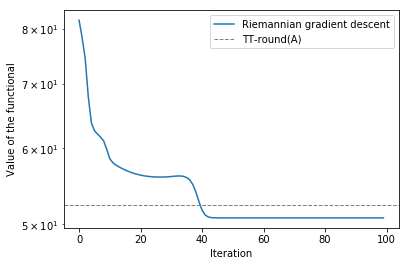

In [7]:
plt.semilogy(log, label='Riemannian gradient descent')
plt.axhline(y=val, lw=1, ls='--', color='gray', label='TT-round(A)')
plt.xlabel('Iteration')
plt.ylabel('Value of the functional')
plt.legend()

## Квантизованное разложение тензорного поезда (QTT)

Рассмотрим одномерный массив $a_k = f(x_k)$, $k=1,\dots,2^d$ где $f$ некоторая одномерная функция, вычисленная в точках сетки $x_k$.

Пусть $$k = {2^{d-1} i_1 + 2^{d-2} i_2 + \dots + 2^0 i_{d}}\quad i_1,\dots,i_d = 0,1 $$ 
двоичное представление $k$, тогда

$$
    a_k = a_{2^{d-1} i_1 + 2^{d-2} i_2 + \dots + 2^0 i_{d}} \equiv \tilde a_{i_1,\dots,i_d},
$$

где $\tilde a$ не что иное как тензор $a$ с изменёнными размерами. TT-разложение $\tilde a$ называется **квантизованным TT-разложением (QTT)**. 

- Интересный факт, что QTT-разложение связано с вейвлетами, более подробно смотрите [тут](https://epubs.siam.org/doi/abs/10.1137/100811647).

- Такое разложение содержит <font color='red'>$\mathcal{O}(\log n r^2)$</font> элементов!

In [86]:
x = torch.linspace(0, 5, steps=2**15)
y = torch.sin(x)
y_t = y.reshape([2 for i in range(15)])
y_tt = tn.Tensor(y_t, ranks_tt=2)
print(y_tt)
print(torch.norm(y_t - y_tt.torch()).item())
print(y_tt.numcoef(), y_tt.numel().item())

15D TT tensor:

  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
  |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
 (0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10)(11)(12)(13)(14)
 / \ / \ / \ / \ / \ / \ / \ / \ / \ / \ / \ / \ / \ / \ / \
1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1

1.0578165355786184e-13
112 32768.0


## Метод крестовой аппроксимации

- Если дано разложение тензора, то нет проблем с быстрым выполнением базовых операций

- Однако, неясно, как получить разложение, когда тензор не может быть сохранён в памяти целиком

- **[Метод крестовой аппроксимации](https://www.mat.uniroma2.it/~tvmsscho/papers/Tyrtyshnikov5.pdf)** позволяет получить тензорное разложение на основе лишь небольшого числа элементов тензора.

## Тензорные сети

- Универсальный способ записи тензорных разложений
- Могут быть интерпретированы как специальная архитектура нейронной сети
- Некоторые теоретические результаты о выразительной силе глубкоих нейронных сетей могут быть получены с использованием аппарата тензорных сетей, пример такого использования можно найти [тут](https://arxiv.org/pdf/1711.00811.pdf)
- [tntorch](https://github.com/rballester/tntorch) объединяет тензорные сети и PyTorch
- Более подробно можно прочитать [здесь](https://arxiv.org/pdf/1609.00893.pdf) и [здесь](https://arxiv.org/abs/1708.09165)

## Резюме 

* Тензорные разложения - полезный инструмент для работы с многомерными данными
* Примеры тензорных разложений: каноническое, Таккера, ТТ и QTT
* Идея крестовой аппроксимации

## На следующей неделе

- Презентация проектов

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()